In [165]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import make_scorer, mean_squared_error, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import unittest
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

Carregamento do Dataset tratado

In [166]:
heartrate = pd.read_csv("wesad-manipulated.csv")
heartrate = heartrate.dropna()
heartrate.head(10)
threshold =0.2
heartrate_original= heartrate
heartrate.count()

subject id         135650
age                135650
height             135650
weight             135650
gender             135650
HR                 135650
SSSQ class         135650
SSSQ Label         135650
condition          135650
condition label    135650
dtype: int64

In [167]:
heartrate.head(30)

,subject id,age,height,weight,gender,HR,SSSQ class,SSSQ Label,condition,condition label
0,13,28,181,82,1,91,2,1,1,0
1,9,26,181,75,1,80,1,0,1,0
2,4,25,175,90,1,62,2,1,0,1
3,8,27,172,64,0,88,1,0,2,2
4,4,25,175,90,1,84,2,1,2,2
5,4,25,175,90,1,84,2,1,2,2
6,16,24,184,69,1,67,1,0,1,0
7,8,27,172,64,0,92,1,0,2,2
8,15,28,186,83,1,82,2,1,1,0
9,2,27,175,80,1,73,0,2,1,0


Testing for data inbalance

In [168]:
threshold =0.2
heartrate_original= heartrate
class_counts = heartrate['condition'].value_counts(normalize=True)
imbalance_flag = any(class_counts < threshold)
imbalance_flag

True

Normalização de valores de stress 
baseline=1
amusement=0
stress=2


Para stress=1 e baseline/amusement=0

In [169]:
#agrupar condition
heartrate= heartrate_original
heartrate['condition label'] = heartrate['condition label'].replace(1, 0)
heartrate['condition'] = heartrate['condition'].replace(1, 0)
heartrate['condition label'] = heartrate['condition label'].replace(2, 1)
heartrate['condition'] = heartrate['condition'].replace(2, 1)
heartrate = heartrate.drop('condition label', axis=1)
heartrate.head(20)

,subject id,age,height,weight,gender,HR,SSSQ class,SSSQ Label,condition
0,13,28,181,82,1,91,2,1,0
1,9,26,181,75,1,80,1,0,0
2,4,25,175,90,1,62,2,1,0
3,8,27,172,64,0,88,1,0,1
4,4,25,175,90,1,84,2,1,1
5,4,25,175,90,1,84,2,1,1
6,16,24,184,69,1,67,1,0,0
7,8,27,172,64,0,92,1,0,1
8,15,28,186,83,1,82,2,1,0
9,2,27,175,80,1,73,0,2,0


Undersampling do problema

In [170]:
#undersampling para diferença de quantidade de dados
# Count the occurrences of each label
count_1 = heartrate['condition'].value_counts()[0]
count_0 = heartrate['condition'].value_counts()[1]
print('stress ' + str(count_0))
print('baseline ' + str(count_1))

stress 40946
baseline 94704


In [171]:
# Determine the number of '1's to keep (equal to the number of '0's)
num_to_keep = count_0

# Randomly sample the majority class ('1') to match the minority class ('0')
df_1_sampled = heartrate[heartrate['condition'] == 1].sample(num_to_keep, random_state=42)

# Combine the sampled '1's with all '0's
df_balanced = pd.concat([heartrate[heartrate['condition'] == 0], df_1_sampled])

# Shuffle the resulting DataFrame
heartrate = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

Remoção de features que não são relevantes

In [172]:
y =  heartrate['condition']
X = heartrate.drop(['condition', 'subject id', 'SSSQ class', 'SSSQ Label'], axis=1)
heartrate.head()

,subject id,age,height,weight,gender,HR,SSSQ class,SSSQ Label,condition
0,2,27,175,80,1,71,0,2,0
1,8,27,172,64,0,72,0,2,0
2,4,25,175,90,1,79,2,1,1
3,14,27,180,80,1,76,0,2,0
4,8,27,172,64,0,76,2,1,0


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

Correlation Matrix

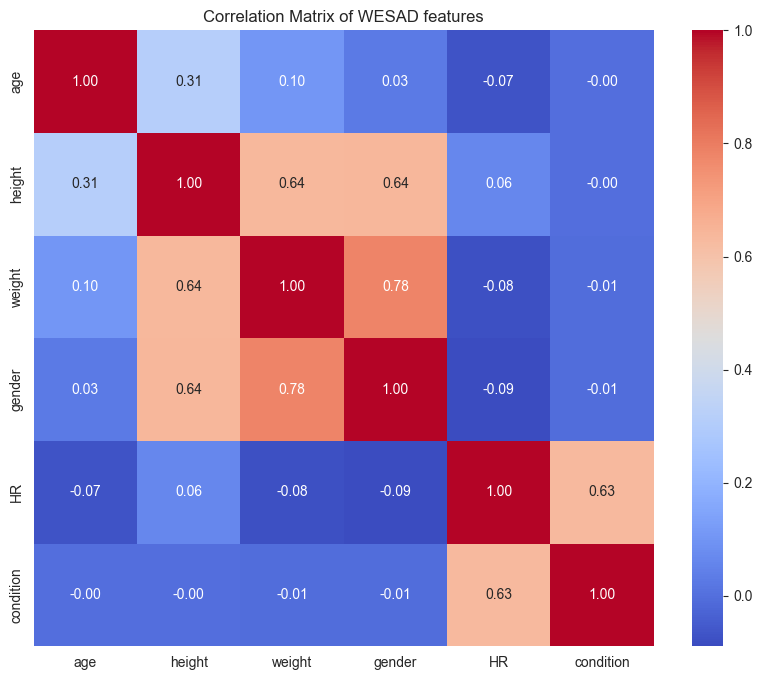

In [174]:
corr = heartrate.drop([ 'subject id', 'SSSQ class', 'SSSQ Label'], axis=1)
correlation_matrix = corr.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of WESAD features')
plt.show()

In [175]:
#remover a feature de output
data_unsuper = X
data_unsuper1= data_unsuper
data_unsuper.head(5)
features = list(data_unsuper.columns)
features= data_unsuper[features]
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
clustering_kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
data_unsuper['clusters'] = clustering_kmeans.fit_predict(data_unsuper)


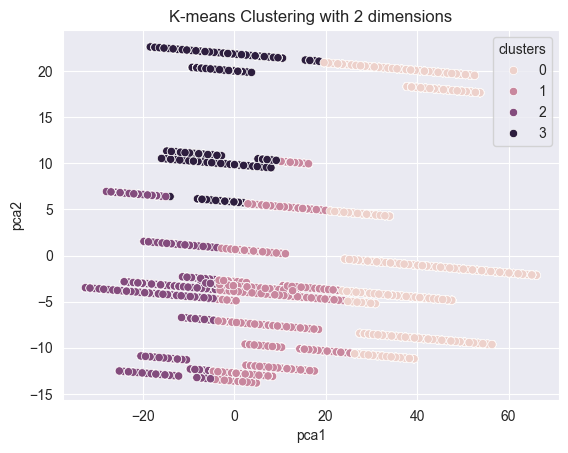

In [176]:
## Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_unsuper)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_unsuper['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Decision Tree Classifier to test if the model is learning

In [177]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# define lists to collect scores
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.767, test: 0.772
>2, train: 0.807, test: 0.807
>3, train: 0.863, test: 0.864
>4, train: 0.909, test: 0.912
>5, train: 0.914, test: 0.916
>6, train: 0.929, test: 0.931
>7, train: 0.937, test: 0.938
>8, train: 0.947, test: 0.947
>9, train: 0.947, test: 0.947
>10, train: 0.951, test: 0.951
>11, train: 0.952, test: 0.951
>12, train: 0.952, test: 0.951
>13, train: 0.952, test: 0.951
>14, train: 0.952, test: 0.951
>15, train: 0.952, test: 0.951
>16, train: 0.952, test: 0.951
>17, train: 0.952, test: 0.951
>18, train: 0.952, test: 0.951
>19, train: 0.952, test: 0.951
>20, train: 0.952, test: 0.951


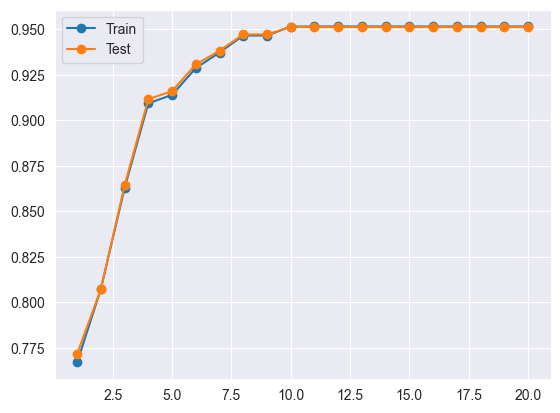

In [178]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [179]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, max_depth=5, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=5)
rf.fit(X_train, y_train)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Scsore: {scores.mean():.2f}")
# Calculate accuracy and print the classification report
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Cross-Validation Scores: [0.92496011 0.9218793  0.9200088  0.92501513 0.93365242]
Mean Cross-Validation Scsore: 0.93
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31253
           1       0.97      0.75      0.84     13512

    accuracy                           0.92     44765
   macro avg       0.93      0.87      0.89     44765
weighted avg       0.92      0.92      0.91     44765



In [180]:
X_train

,age,height,weight,gender,HR
25911,27,170,66,1,76
79349,28,178,76,1,78
98652,27,180,80,1,82
22005,28,184,74,1,70
56001,27,172,64,0,71
...,...,...,...,...,...
128170,27,180,80,1,72
53869,35,189,80,1,63
3994,28,186,83,1,85
33886,28,181,82,1,88


In [181]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

rf_d = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_d, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

# Train the best model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     31253
           1       0.95      0.88      0.92     13512

    accuracy                           0.95     44765
   macro avg       0.95      0.93      0.94     44765
weighted avg       0.95      0.95      0.95     44765



In [182]:
X_train

,age,height,weight,gender,HR
25911,27,170,66,1,76
79349,28,178,76,1,78
98652,27,180,80,1,82
22005,28,184,74,1,70
56001,27,172,64,0,71
...,...,...,...,...,...
128170,27,180,80,1,72
53869,35,189,80,1,63
3994,28,186,83,1,85
33886,28,181,82,1,88


Treino com SVM

In [183]:
# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.2f}')
report = classification_report(y_test, svm_predictions)
print("Classification Report:")
print(report)

SVM Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     31253
           1       0.81      0.53      0.64     13512

    accuracy                           0.82     44765
   macro avg       0.82      0.74      0.76     44765
weighted avg       0.82      0.82      0.81     44765



In [184]:
#treinar com KNN
# Create the KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     31253
           1       0.91      0.88      0.89     13512

    accuracy                           0.94     44765
   macro avg       0.93      0.92      0.92     44765
weighted avg       0.94      0.94      0.94     44765



In [185]:
#treinar com LDA
# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     31253
           1       0.80      0.49      0.61     13512

    accuracy                           0.81     44765
   macro avg       0.81      0.72      0.74     44765
weighted avg       0.81      0.81      0.79     44765



Teste sem ter condition label de utilizador

In [186]:
X

,age,height,weight,gender,HR,clusters
0,27,175,80,1,71,2
1,27,172,64,0,72,3
2,25,175,90,1,79,1
3,27,180,80,1,76,2
4,27,172,64,0,76,3
...,...,...,...,...,...,...
135645,27,175,80,1,79,1
135646,29,165,55,0,99,0
135647,27,173,69,1,80,3
135648,26,181,75,1,80,1


Carregamento e teste com dados reais

In [187]:

# Load the new data
real_data = pd.read_csv('data_extracted_smartwaches.csv') 

# Create a DataFrame to store the results
results = pd.DataFrame(columns=real_data.columns.tolist() + ['Random_Forest_Prediction','Random_Forest_Prediction_CV', 'SVM_Prediction','KNN_Prediction', 'LDA_Prediction'])

# Iterate over each row in the new_data DataFrame
for index, row in real_data.iterrows():
    # Convert the row to a 2D array (needed for prediction)
    feature_names = real_data.columns.tolist()
    # Drop 'condition label' and reshape while preserving feature names
    row_2d = row.drop('condition label').values.reshape(1, -1)
    row_2d_with_names = pd.DataFrame(row_2d, columns=feature_names[:-1])  # Adjust columns after dropping
    # Make predictions using the models with condition label
    random_forest_prediction_cv = rf.predict(row_2d_with_names)[0]
    random_forest_prediction = best_rf.predict(row_2d_with_names)[0]
    svm_prediction = svm_model.predict(row_2d_with_names)[0]
    knn_prediction = knn.predict(row_2d_with_names)[0]
    lda_prediction = lda.predict(row_2d_with_names)[0]
    # Create a new row for the results DataFrame
    result_row = row.tolist() + [random_forest_prediction, random_forest_prediction_cv,svm_prediction, knn_prediction,lda_prediction]
    
    # Append the result row to the results DataFrame
    results.loc[index] = result_row

# Print or save the results DataFrame
print(results)

# Optionally, save the results to a new CSV file
#results.to_csv('predictions_with_results.csv', index=False)

    age  height  weight  gender   HR  condition label  \
0    23     177      94       1  106                1   
1    23     177      94       1   98                1   
2    23     177      94       1  102                1   
3    23     177      94       1   97                0   
4    23     177      94       1   96                0   
5    23     177      94       1   93                0   
6    26     192     103       1   76                1   
7    26     192     103       1  130                1   
8    26     192     103       1   78                1   
9    26     192     103       1   63                0   
10   26     192     103       1   69                0   
11   26     192     103       1   73                0   

    Random_Forest_Prediction  Random_Forest_Prediction_CV  SVM_Prediction  \
0                          1                            1               1   
1                          1                            0               0   
2                          